Read https://plot.ly/python/getting-started/ to have plotly to work with jupyterlab or jupyter notebooks... (there is some extensions to install)

In [2]:
from urllib.request import urlopen
import json
import pandas as pd
import plotly.graph_objects as go

In [3]:
with urlopen("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson") as response:
    departements = json.load(response)

In [4]:
for obs in departements['features']:
    obs["id"] = obs["properties"]['code']

In [5]:
df = pd.read_csv("./../first_results_by_dep (version 1).csv", sep = ";")

In [6]:
for obs in departements['features']:
    obs["id"] = obs["properties"]['code']

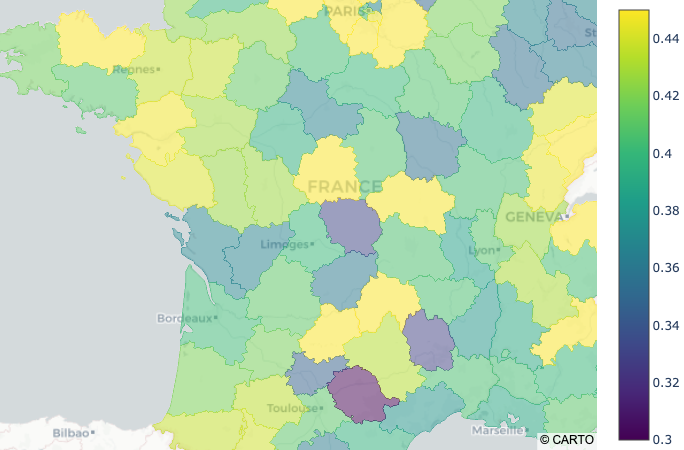

In [9]:
fig = go.Figure(go.Choroplethmapbox(geojson=departements, locations=df.DEP.str.zfill(2), z=df.Upward_mobility,
                                    colorscale="Viridis", zmin=0.3, zmax=0.45,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=5.2, mapbox_center = {"lat": 46.0902, "lon": 1})
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.show()

In [10]:
fig.write_html('first_figure.html')